In [1]:
using Random
using Distributions
using Plots

Random.seed!(1234);
gr();

In [2]:
include("../feature/feature.jl")
include("../linear/linear.jl")

predict (generic function with 8 methods)

In [3]:
function create_toy_data(func, sample_size, std)
    x = collect(range(0, stop=1.0, length=sample_size));
    noise = rand(Normal(0.0, std), sample_size);
    return x, func(x) + noise
end

function sinusoidal(x)
    return sin.(2 * pi * x)
end

sinusoidal (generic function with 1 method)

add some Gaussian noise to the data points generated from sinusoidal function

$$
y \sim \sin(2 \pi x) + \mathcal{N}(0, \sigma^2)
$$

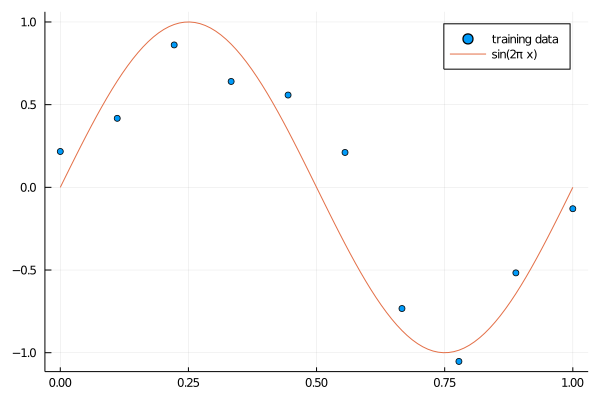

In [4]:
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25);
x_test = collect(range(0, stop=1.0, length=100));
y_test = sinusoidal(x_test);

plot(x_train, y_train, seriestype=:scatter, label="training data", legend=:topright)
plot!(x_test, y_test, label="sin(2π x)")

We fit the data points with the linear cohesion of polynomial functions

$$
t_n \sim \boldsymbol{\phi}(x_n) \boldsymbol{w}.
$$

The answer is given by

$$
\boldsymbol{w} = (\boldsymbol{\Phi}^{T} \boldsymbol{\Phi})^{-1} \boldsymbol{\Phi}^{T} \boldsymbol{t}
$$

where $\boldsymbol{\Phi}$ is

$$
\boldsymbol{\Phi} = \begin{bmatrix} \boldsymbol{\phi}^{T} (\boldsymbol{x_1}) \\ \boldsymbol{\phi}^{T} (\boldsymbol{x_2}) \\ \vdots \\ \boldsymbol{\phi}^{T}(\boldsymbol{x_N}) \end{bmatrix}
$$

In [5]:
feature = PolynomialFeature(9);
X_train = transform(feature, x_train);
X_test = transform(feature, x_test);
#x = collect(reshape(range(0, stop=1.0, length=10), 10));
model = LinearRegressor([0], 0);
#Phi = collect(reshape(transpose(X_train), size(X_train)[2], size(X_train)[1]));
fitting(model, X_train, y_train);
#tmp = collect(reshape(transpose(X_test), size(X_test)[2], size(X_test)[1]));
y, y_std = predict(model, X_test, true);

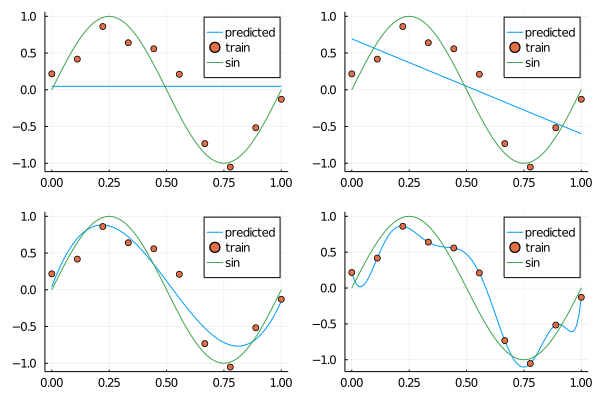

In [6]:
l = @layout [a b; c d]
plots = []
for i in [0, 1, 3, 9]
    feature = PolynomialFeature(i);
    X_train = transform(feature, x_train);
    X_test = transform(feature, x_test);
    #x = range(0, stop=1.0, length=10);
    model = LinearRegressor([0], 0);
    fitting(model, X_train, y_train);
    y = predict(model, X_test, false);
    p = plot(x_test, y, label="predicted", legend=:topright);
    p = plot!(x_train, y_train, label="train", seriestype=:scatter);
    p = plot!(x_test, y_test, label="sin");
    push!(plots, p);
end

plot(plots[1], plots[2], plots[3], plots[4], layout=l)

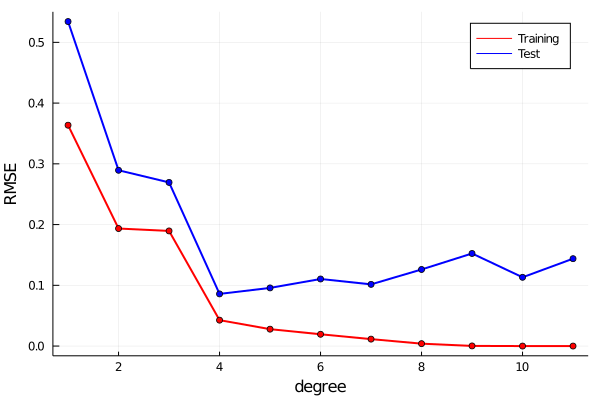

In [7]:
using LinearAlgebra

function rmse(a::Array{Float64, 1}, b::Array{Float64, 1})
    return sum((b - a).^2) / size(a)[1]
end

training_errors = [];
test_errors = [];

for i in 0:10
    feature = PolynomialFeature(i);
    X_train = transform(feature, x_train);
    X_test = transform(feature, x_test);

    model = LinearRegressor([0], 0);
    fitting(model, X_train, y_train);
    y_trained = predict(model, X_train, false);
    push!(training_errors, rmse(predict(model, X_train, false), y_train));
    push!(test_errors, rmse(predict(model, X_test, false), y_test +  rand(Normal(0.0, 0.25), size(y_test)[1])));
end

plot(training_errors, xlabel="degree", ylabel="RMSE", lw=2, linecolor=:red, label="Training")
plot!(test_errors, lw=2, linecolor=:blue, label="Test")
plot!(training_errors, seriestype=:scatter, markercolor=:red, label=nothing)
plot!(test_errors, seriestype=:scatter, markercolor=:blue, label=nothing)